# Import libraries and datasets

In [1]:
# %%capture
# !pip install surprise
# !pip install pandas

# !pip install scikit-surprise

In [2]:
# %%capture
# !pip install surprise
# !pip install pandas
# !pip install scikit-surprise
# !pip install scikit-learn
# !pip install matplotlib
# !pip install seaborn
# !pip install plotly

In [3]:
# Install the required packages
!pip install scikit-surprise
!pip install pandas

# Import the necessary modules


  Using cached scikit-surprise-1.1.3.tar.gz (771 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [60 lines of output]
      <string>:65: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
      !!
      
              ********************************************************************************
              Requirements should be satisfied by a PEP 517 installer.
              If you are using pip, you can try `pip install --use-pep517`.
              ********************************************************************************
      
      !!
      C:\Users\Acer\AppData\Local\Programs\Python\Python311\python.exe: No module named pip
      Traceback (most recent call last):
        File "C:\Users\Acer\AppData\Local\Temp\pip-build-env-5is_p9xj\overlay\Lib\site-packages\setuptools\installer.py", line 101, in _fetch_build_egg_no_warn
          subprocess.check_call(cmd)
        File "C:\Users\Acer\AppData\Local\Programs\

In [4]:
# Packages for data processing
import numpy as np
import pandas as pd
import datetime
# import surprise
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
from scipy.sparse import csr_matrix
import scipy as sp


# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot, iplot
%matplotlib inline

# Packages for modeling
# from surprise import Reader
# from surprise import Dataset
# from surprise import KNNWithMeans
# from surprise import KNNBasic
# from surprise.model_selection import cross_validate
# from surprise.model_selection import GridSearchCV
# from surprise import SVD
# from surprise import SVDpp
# from surprise import NMF
# from surprise import SlopeOne
# from surprise import CoClustering
# import heapq

# Packages for model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from time import time

# Package to suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Packages for saving models
import pickle

# Load data


In [5]:
# from google.colab import drive
# drive.mount('/content/drive')


In [6]:
import os

# Path to the folder containing your CSV files
folder_path = "C:/Users/Acer/Documents/Software/ExploreAI/Sprint_07_Unsupervised_Learning/project/FM2_Unsupervised_Movie_Recommendation_model"

# Change the current working directory to the folder containing your CSV files
os.chdir(folder_path)

In [7]:

# Load train.csv
train = pd.read_csv('train.csv')

# Load test.csv
test = pd.read_csv('test.csv')

# Load movies.csv
movies = pd.read_csv('movies.csv')

# Load imdb_data.csv
imdb_data = pd.read_csv('imdb_data.csv')

# Load genome_tags.csv
genome_tags = pd.read_csv('genome_tags.csv')

# Load tags.csv
tags = pd.read_csv('tags.csv')

# Load links.csv
links = pd.read_csv('links.csv')

# Load genome_scores.csv
genome_scores = pd.read_csv('genome_scores.csv')


# Evaluating Data

In [8]:
train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


**Train:**

UserId

movieId : Identifier for movies used

rating : Ratings are made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars).

timestamp: represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.


In [9]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [10]:
imdb_data.head(1)

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation


In [11]:
genome_tags.head(1)

,tagId,tag
0,1,007


**genome-tags:**

* tagId
* tag : tag descriptions for the tag IDs in the genome file

In [12]:
genome_scores.head(10)

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075
5,1,6,0.14675
6,1,7,0.06350
7,1,8,0.20375
8,1,9,0.20200
9,1,10,0.03075


**genome-scores:**

* movieId : Identifier for movies
* tagId :
* relevance

In [13]:
tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


**tags:**

* userId
* movieId
* tag : User-generated metadata about movies. Each tag is typically a single word or short phrase. The meaning, value, and * purpose of a particular tag is determined by each user.
* timestamp : represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970

In [14]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


# Data Preprocessing


In [15]:
#check for missing values
train.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [16]:
# check duplicates
duplicates = train.duplicated(['userId', 'movieId', 'rating'])

print("Number of duplicate records:", sum(duplicates))

Number of duplicate records: 0


In [17]:
# Create a copy
df = train.copy()

In [18]:
# Create a copy of the train data
df_train = train.copy()

df_train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [19]:
# Find the length of the unique use
len(df_train['userId'].unique()), len(df_train['movieId'].unique())

(162541, 48213)

In [20]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [21]:
len(movies['movieId'].unique())

62423

# Joining Datasets

In [22]:
# Merge the ratings and movies
df_train1 = df_train.merge(movies, on='movieId')
df_train1.head()

,userId,movieId,rating,timestamp,title,genres
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller
2,137050,57669,4.0,1425631854,In Bruges (2008),Comedy|Crime|Drama|Thriller
3,120490,57669,4.5,1408228517,In Bruges (2008),Comedy|Crime|Drama|Thriller
4,50616,57669,4.5,1446941640,In Bruges (2008),Comedy|Crime|Drama|Thriller


In [23]:
# Merging the dataset with the imbd
df_train2 = df_train.merge(imdb_data, on="movieId")
df_train2.head()

,userId,movieId,rating,timestamp,title_cast,director,runtime,budget,plot_keywords
0,5163,57669,4.0,1518349992,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
1,87388,57669,3.5,1237455297,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
2,137050,57669,4.0,1425631854,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
3,120490,57669,4.5,1408228517,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
4,50616,57669,4.5,1446941640,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman


In [24]:
# Merging the merge data earlier on with the df_imbd
df_train3 = df_train1.merge(imdb_data, on="movieId" )
df_train3.head()

,userId,movieId,rating,timestamp,title,genres,title_cast,director,runtime,budget,plot_keywords
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
2,137050,57669,4.0,1425631854,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
3,120490,57669,4.5,1408228517,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
4,50616,57669,4.5,1446941640,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman


In [25]:
# Check the null values of the data that has just been merged.
df_train3.isnull().sum()

userId                 0
movieId                0
rating                 0
timestamp              0
title                  0
genres                 0
title_cast       2604407
director         2602688
runtime          2653058
budget           3152276
plot_keywords    2610043
dtype: int64

In [26]:
# View keywords
df_train3['plot_keywords'].tail(100)

9632931                                                NaN
9632932    sex|male frontal nudity|prostitution|perversity
9632933                                     color in title
9632934                                                NaN
9632935         murder|serial killer|peeping|female nudity
                                ...                       
9633026                                                NaN
9633027      janitor|income|housing problem|social problem
9633028                                                NaN
9633029                     soldier|italy|partisan|fascist
9633030             genius|artist|greek american|direction
Name: plot_keywords, Length: 100, dtype: object

In [27]:
# Extract unique values from rating column
train['rating'].unique()

array([4. , 4.5, 5. , 2. , 3. , 1. , 3.5, 2.5, 0.5, 1.5])

**Merging More Datasets**

In [28]:
# Merging the dataset with that of the imbd
df_tain2 = df_train.merge(imdb_data, on="movieId")
df_train2.head(1)

,userId,movieId,rating,timestamp,title_cast,director,runtime,budget,plot_keywords
0,5163,57669,4.0,1518349992,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman


In [29]:
# Merging the merge data earlier on with the df_imbd
df_train3 = df_train1.merge(imdb_data, on="movieId" )
df_train3.head()

,userId,movieId,rating,timestamp,title,genres,title_cast,director,runtime,budget,plot_keywords
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
2,137050,57669,4.0,1425631854,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
3,120490,57669,4.5,1408228517,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
4,50616,57669,4.5,1446941640,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman


# Exploratory data analysis(EDA)

In [30]:
train['rating'].describe()

count    1.000004e+07
mean     3.533395e+00
std      1.061124e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


In [32]:
data = df_train1['rating'].value_counts().sort_index(ascending=False)

**Observations:**

* We can observe that a high percentage of our movies were rated above average i.e above 3
* A low percentage were below 3

**Recommendations:**

* More movies are high quality perhaps people are watching movies that are recommended to them, either by their social groups or the recommender system itself.

In [33]:
df_train3.rename(columns={'rating_x': 'rating', 'rating_y': 'numRatings'}, inplace=True)
#Create dataframe
num_ratings = pd.DataFrame(df_train3.groupby('movieId').count()['rating']).reset_index()
#merge num ratings with df_train3
df_train3 = pd.merge(left=df_train3, right=num_ratings, on='movieId')
# rename columns
df_train3.rename(columns={'rating_x': 'rating', 'rating_y': 'numRatings'}, inplace=True)

In [34]:
# pre_process the budget column
# Convert 'budget' column to string type
df_train3["budget"] = df_train3["budget"].astype(str)

# Remove commas
df_train3["budget"] = df_train3["budget"].str.replace(",", "")

# Extract numerical values
df_train3["budget"] = df_train3["budget"].str.extract("(\d+)", expand=False)

# Convert the feature into a float
df_train3["budget"] = df_train3["budget"].astype(float)

# Remove nan values and replace with 0
df_train3["budget"] = df_train3["budget"].replace(np.nan, 0)

# Convert the feature into an integer
df_train3["budget"] = df_train3["budget"].astype(int)

In [35]:
df_train3#extracting date from title column
df_train3['release_year'] = df_train3.title.str.extract('(\(\d\d\d\d\))', expand=False)

#adding date to realse year column
df_train3['release_year'] = df_train3.release_year.str.extract('(\d\d\d\d)', expand=False)

df_train3.head(2)

,userId,movieId,rating,timestamp,title,genres,title_cast,director,runtime,budget,plot_keywords,numRatings,release_year
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,15000000,dwarf|bruges|irish|hitman,4253,2008
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,15000000,dwarf|bruges|irish|hitman,4253,2008


In [36]:
df_train3['release_year'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9633031 entries, 0 to 9633030
Series name: release_year
Non-Null Count    Dtype 
--------------    ----- 
9633005 non-null  object
dtypes: object(1)
memory usage: 73.5+ MB


In [37]:
#drop duplicates on dataframe
data_1= df_train3.drop_duplicates('movieId')

data_1.head(2)

,userId,movieId,rating,timestamp,title,genres,title_cast,director,runtime,budget,plot_keywords,numRatings,release_year
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,15000000,dwarf|bruges|irish|hitman,4253,2008
4253,106343,5,4.5,1206238739,Father of the Bride Part II (1995),Comedy,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,30000000,fatherhood|doberman|dog|mansion,4648,1995


# Genres

In [38]:
movies = movies.copy()

In [39]:
# Make a census of the genre keywords
genre_labels = set()
for s in movies['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

# Function that counts the number of times each of the genre keywords appear
def count_word(dataset, ref_col, census):
    """

    This function counts the number of times each
    of the genre keywords appear

    Input : movies dataframe, column from dataframe,
    label column from dataframe
    datatype : dataframe

    output : list

    """
    keyword_count = dict()
    for s in census:
        keyword_count[s] = 0
    for census_keywords in dataset[ref_col].str.split('|'):
        if type(census_keywords) == float and pd.isnull(census_keywords):
            continue
        for s in [s for s in census_keywords if s in census]:
            if pd.notnull(s):
                keyword_count[s] += 1

    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

# Calling this function gives access to a list of genre keywords which are sorted by decreasing frequency
keyword_occurences, dum = count_word(movies, 'genres', genre_labels)
keyword_occurences[:5]

[['Drama', 25606],
 ['Comedy', 16870],
 ['Thriller', 8654],
 ['Romance', 7719],
 ['Action', 7348]]

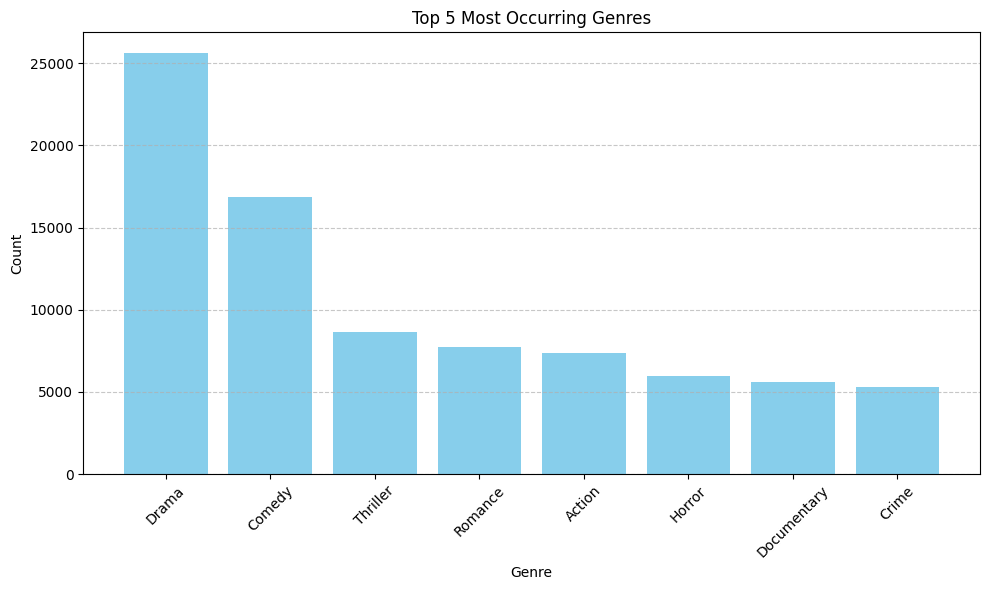

In [40]:
# Make a census of the genre keywords
genre_labels = set()
for s in movies["genres"].str.split("|").values:
    genre_labels = genre_labels.union(set(s))


# Function that counts the number of times each of the genre keywords appear
def count_word_plotter(dataset, ref_col, census):
    keyword_count = dict()
    for s in census:
        keyword_count[s] = 0
    for census_keywords in dataset[ref_col].str.split("|"):
        if type(census_keywords) == float and pd.isnull(census_keywords):
            continue
        for s in [s for s in census_keywords if s in census]:
            if pd.notnull(s):
                keyword_count[s] += 1

    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    for k, v in keyword_count.items():
        keyword_occurences.append([k, v])
    keyword_occurences.sort(key=lambda x: x[1], reverse=True)
    return keyword_occurences, keyword_count


# Calling the function to get keyword occurrences
keyword_occurences, dum = count_word_plotter(movies, "genres", genre_labels)

# Extracting genre labels and counts
genres = [genre[0] for genre in keyword_occurences[:8]]
counts = [genre[1] for genre in keyword_occurences[:8]]

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(genres, counts, color="skyblue")
plt.title("Top 5 Most Occurring Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [41]:
df = imdb_data[['movieId','title_cast','director', 'plot_keywords']]
df = df.merge(movies[['movieId', 'genres', 'title']], on='movieId', how='inner')
df.head()

,movieId,title_cast,director,plot_keywords,genres,title
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,toy|rivalry|cowboy|cgi animation,Adventure|Animation|Children|Comedy|Fantasy,Toy Story (1995)
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,board game|adventurer|fight|game,Adventure|Children|Fantasy,Jumanji (1995)
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,boat|lake|neighbor|rivalry,Comedy|Romance,Grumpier Old Men (1995)
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,black american|husband wife relationship|betra...,Comedy|Drama|Romance,Waiting to Exhale (1995)
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,fatherhood|doberman|dog|mansion,Comedy,Father of the Bride Part II (1995)


In [121]:
# Convert data types to strings for string handling
df['title_cast'] = df.title_cast.astype(str)
df['plot_keywords'] = df.plot_keywords.astype(str)
df['genres'] = df.genres.astype(str)
df['director'] = df.director.astype(str)

# Removing spaces between names
df['director'] = df['director'].apply(lambda x: "".join(x.lower() for x in x.split()))
df['title_cast'] = df['title_cast'].apply(lambda x: "".join(x.lower() for x in x.split()))

# Discarding the pipes between the actors' full names and getting only the first three names
df['title_cast'] = df['title_cast'].map(lambda x: x.split('|')[:3])

# Discarding the pipes between the plot keywords' and getting only the first five words
df['plot_keywords'] = df['plot_keywords'].map(lambda x: x.split('|')[:5])
df['plot_keywords'] = df['plot_keywords'].apply(lambda x: " ".join(x))

# Discarding the pipes between the genres
df['genres'] = df['genres'].map(lambda x: x.lower().split('|'))
df['genres'] = df['genres'].apply(lambda x: " ".join(x))

df.head()

,movieId,title_cast,director,plot_keywords,genres,title
0,1,"[tomhanks, timallen, donrickles]",johnlasseter,toy rivalry cowboy cgi animation,adventure animation children comedy fantasy,Toy Story (1995)
1,2,"[robinwilliams, jonathanhyde, kirstendunst]",jonathanhensleigh,board game adventurer fight game,adventure children fantasy,Jumanji (1995)
2,3,"[waltermatthau, jacklemmon, sophialoren]",markstevenjohnson,boat lake neighbor rivalry,comedy romance,Grumpier Old Men (1995)
3,4,"[whitneyhouston, angelabassett, lorettadevine]",terrymcmillan,black american husband wife relationship betra...,comedy drama romance,Waiting to Exhale (1995)
4,5,"[stevemartin, dianekeaton, martinshort]",alberthackett,fatherhood doberman dog mansion,comedy,Father of the Bride Part II (1995)


# Genre Popularity

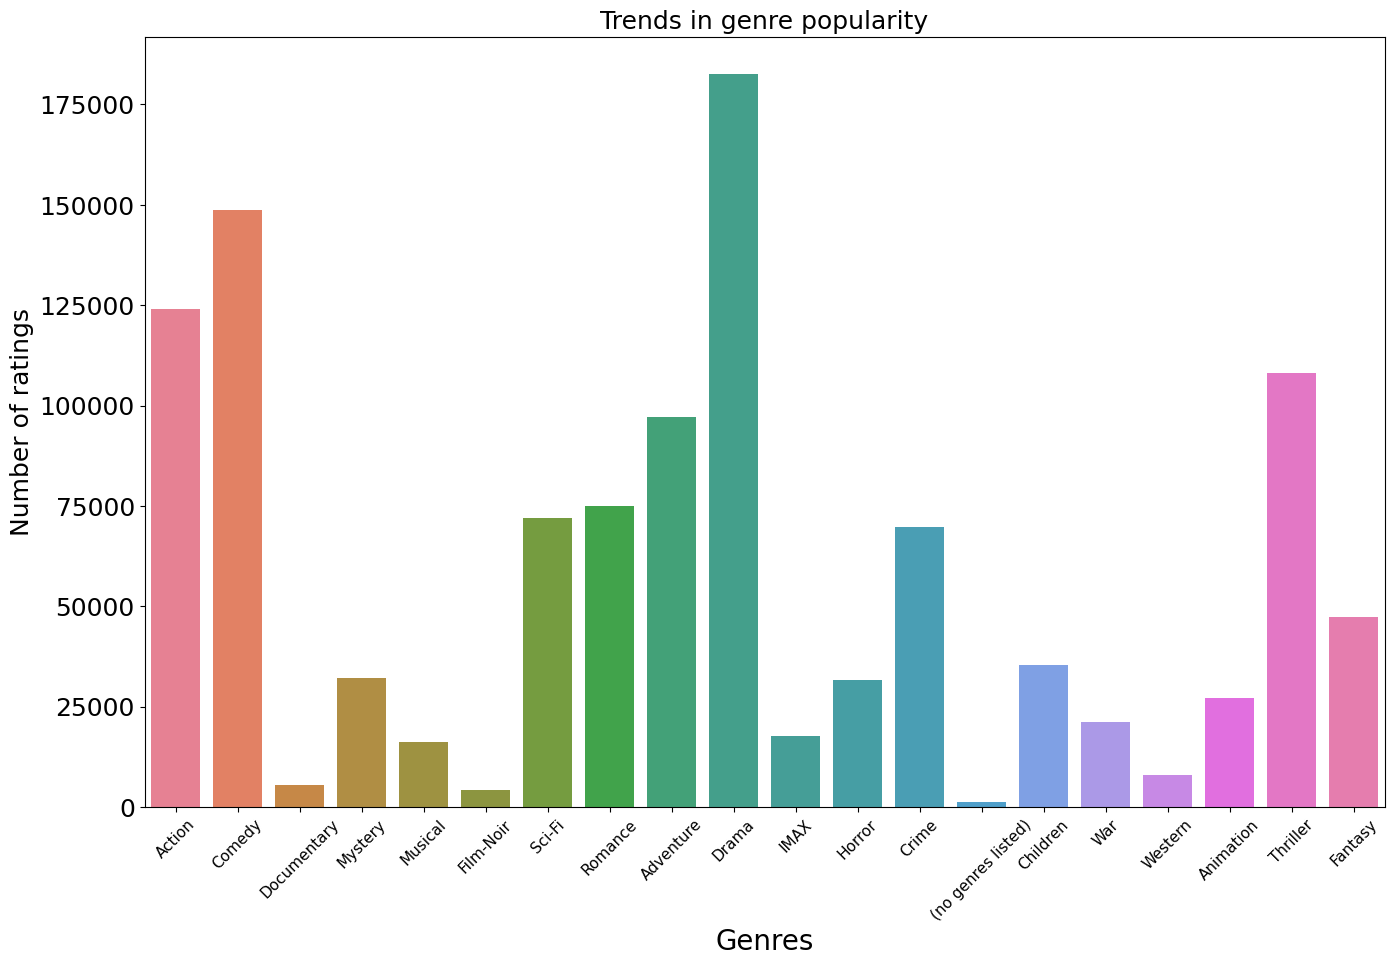

In [122]:
def most_watched(input_df):

    """

    This function gives out the number of ratings
    for each genre for each year since 1970

    Input : dataframe
    datatype : dataframe

    output : Figure (bar graph)

    """
    # Create a copy of the input dataframe and merge it to the movies dataframe
    df = input_df.copy()
    df = df.merge(movies,on='movieId',how='left')

    # Create an empty dataframe
    b = pd.DataFrame()

    # Extract the timestamps and genres
    timestamps = [timestamp for timestamp in df.timestamp]
    all_genres = set(','.join([genres.replace('|',',') for genres in df.genres]).split(','))

    # Get the number of ratings for each genre for each year since 1970
    for index,genre in enumerate(all_genres):
        a = pd.Series([int((timestamps[i]/31536000)+1970) for i,x in enumerate(df.genres) if genre in x])
        a = a.value_counts()
        b = pd.concat([b,pd.DataFrame({genre:a})],axis=1)

    # Create trace
    trace = go.Bar(x = data.index,
    text = ['{:.1f} %'.format(val) for val in (data.values / df_train1.shape[0] * 100)],
    textposition = 'auto',
    textfont = dict(color = '#000000'),
    y = data.values,
    marker = dict(color = '#db0000'))

    # Plot the trends for each genre on the same line graph
    plt.figure(figsize=(16,10))
    plot = sns.barplot(data=b, ci=None)

    # Add plot labels
    plt.title('Trends in genre popularity',fontsize=18)
    plt.xlabel('Genres', fontsize=20)
    plt.xticks(rotation=45, fontsize=11)
    plt.yticks(fontsize=18)
    plt.ylabel('Number of ratings', fontsize=18)

    plt.show()

    return

most_watched(train)

**Insights:**

Rating-Viewership Correlation:
High ratings typically indicate high viewership.

Top Genres by Views:
Comedy, Drama, and Action genres consistently attract the most viewers.

Recommendation:
Prioritize producing movies in Comedy, Drama, and Action genres to maximize viewership and revenue.

# Popular Movies by Genre

In [124]:
genre_df = pd.DataFrame(df_train3['genres'].str.split('|').tolist(), index=df_train3['movieId']).stack()
genre_df = genre_df.reset_index([0, 'movieId'])
genre_df.columns = ['movieId', 'Genre']

# Movie Published per Year

The Number of Movies Published each year: 713


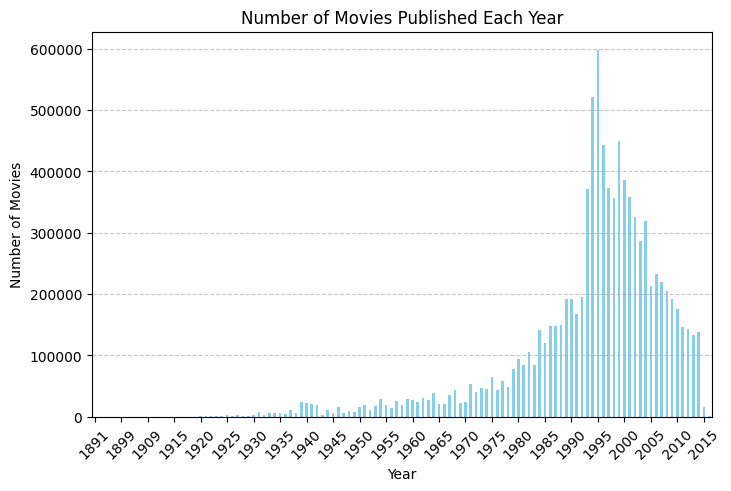

In [ ]:
# Create an empty list
years = []
# Finding the number of movies published in each year
for title in df_train3['title']:
    year_subset = title[-5:-1]
    try: years.append(int(year_subset))
    except: years.append(9999)
# Create a new column in a dataframe.
df_train3['moviePubYear'] = years
print('The Number of Movies Published each year:',len(df_train3[df_train3['moviePubYear'] == 9999]))

# Count the number of movies published each year
movies_per_year = df_train3["moviePubYear"].value_counts().sort_index()

# Custom color palette for bars
custom_colors = [
    "#FF5733",
    "#FFC300",
    "#FF5733",
    "#FFC300",
    "#FF5733",
    "#FFC300",
    "#FF5733",
    "#FFC300",
]



# Plotting the graph
plt.figure(figsize=(8, 5))
movies_per_year.plot(kind="bar", color="skyblue")
plt.title("Number of Movies Published Each Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)

# Set x-axis labels for every 10 years
plt.xticks(range(0, len(movies_per_year), 5), movies_per_year.index[::5])

plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**Observations:**

A downward trend in the annual production of movies has been noted since the year 2000.
**Recommendations:**

The specific causes for the reduction in movie releases are not definitively known, however, the economic downturns of 2000 and 2009 may have contributed to this trend.

In [ ]:
df_train3.head(2)

,userId,movieId,rating,timestamp,title,genres,title_cast,director,runtime,budget,plot_keywords,numRatings,release_year,moviePubYear
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,15000000,dwarf|bruges|irish|hitman,4253,2008,2008
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,15000000,dwarf|bruges|irish|hitman,4253,2008,2008


In [ ]:
# Create a dataframe with the number of movies that the directors have made
director_m = pd.DataFrame(data_1.groupby('director').count()['title'].sort_values(ascending=False)).reset_index()
director_m.head()

,director,title
0,Luc Besson,26
1,See full summary,25
2,Woody Allen,25
3,Stephen King,23
4,William Shakespeare,18


# Top Ten Budget Movies

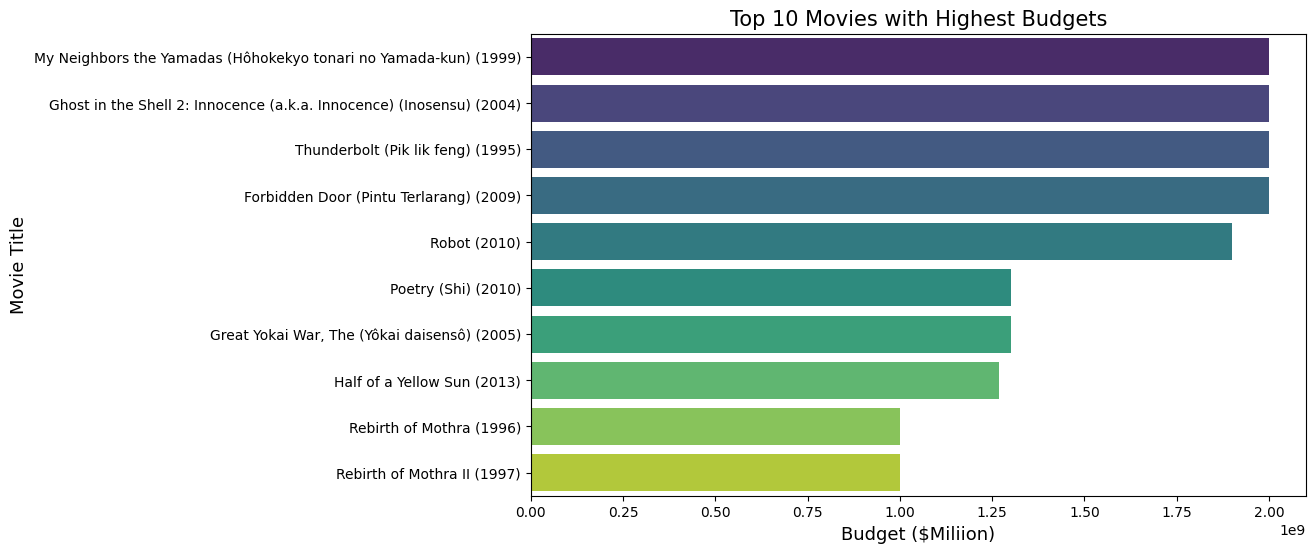

In [ ]:
# make a plot which contain top 10 highest budget movies.
# sort the 'budget' column in decending order and store it in the new dataframe.
info = pd.DataFrame(data_1["budget"].sort_values(ascending=False))
info["title"] = data_1["title"]
data = list(map(str, (info["title"])))

# extract the top 10 budget movies data from the list and dataframe.
x = list(data[:10])
y = list(info["budget"][:10])

# Extract the top 10 budget movies data from the list and dataframe.
top_10_movies = info.head(10)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_10_movies["budget"], y=top_10_movies["title"], palette="viridis")
ax.set_title("Top 10 Movies with Highest Budgets", fontsize=15)
ax.set_xlabel("Budget ($Miliion)", fontsize=13)
ax.set_ylabel("Movie Title", fontsize=13)
plt.show()

**Observations:**

This is a bar graph which shows the Top 10 high budget movies of which My Way is the Top budget Movie.

# Top Ten Longest Movies

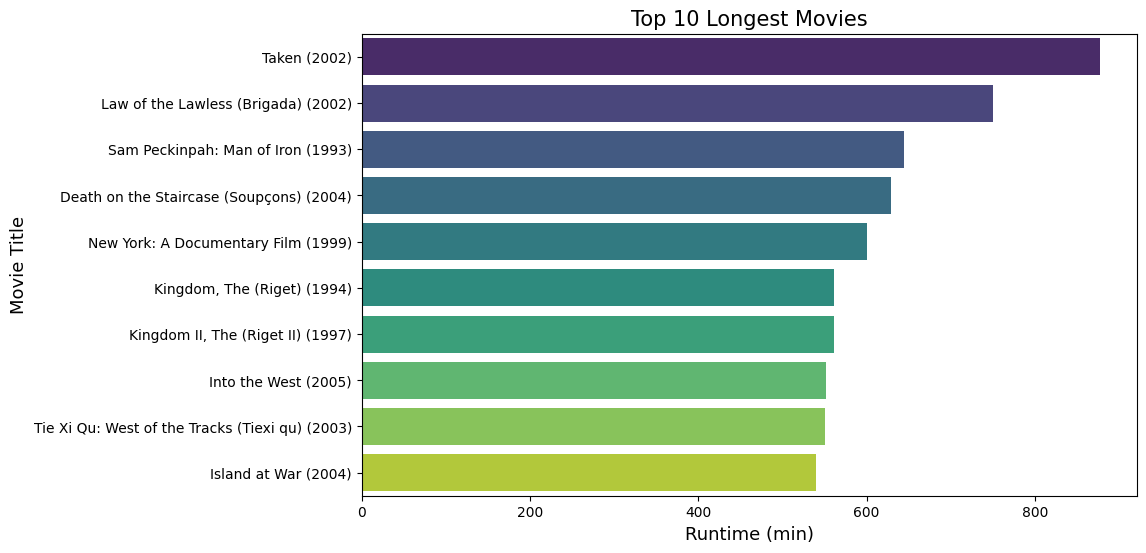

In [ ]:
# top 10 Movies With Longest runtime
# sort the 'runtime' column in decending order and store it in the new dataframe.
info = pd.DataFrame(data_1['runtime'].sort_values(ascending = False))
info['title'] = data_1['title']
data = list(map(str,(info['title'])))

# Extract the top 10 longest duration movies data from the list and dataframe
x = info["title"][:10]
y = info["runtime"][:10]

# Create the bar plot and setup the title and labels
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=y, y=x, palette="viridis")
ax.set_title("Top 10 Longest Movies", fontsize=15)
ax.set_xlabel("Runtime (min)", fontsize=13)
ax.set_ylabel("Movie Title", fontsize=13)
plt.show()

**Observations:**

This is a bar graph which shows the top 10 longest movies of which Taken is the longest Movie.

# Correlation of Features

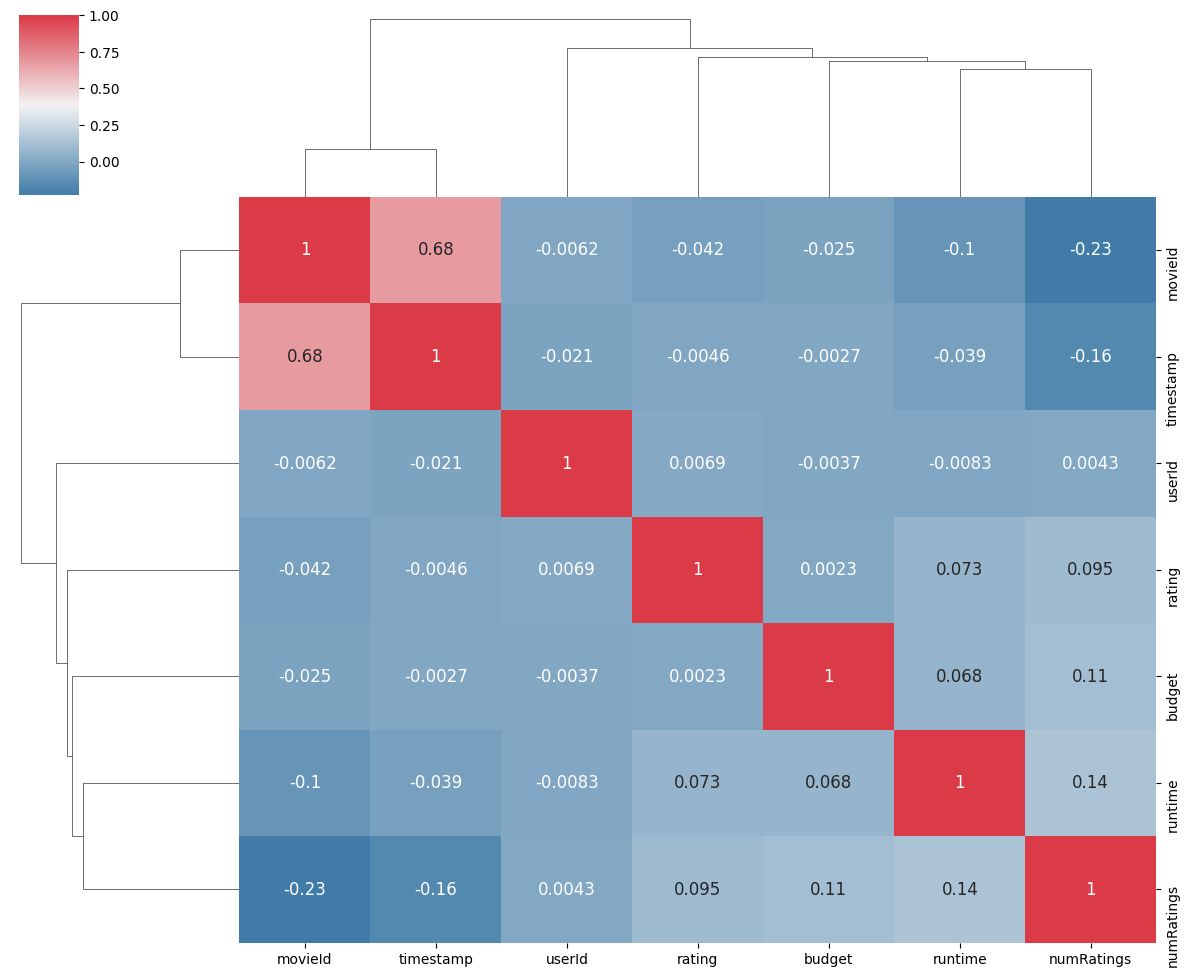

In [ ]:
def plot_correlation_map(df):
    """
    This function generates a correlation map using all the features from the DataFrame.

    Parameters:
    df (DataFrame): Input DataFrame containing the features for correlation analysis.

    Returns:
    None (displays the plot)
    """
    # Calculate correlation matrix
    corr = df.corr()

    # Create a diverging color palette
    cmap = sns.diverging_palette(240, 10, as_cmap=True)

    # Create a clustered heatmap
    sns.clustermap(
        corr,
        cmap=cmap,
        figsize=(12, 10),
        annot=True,
        annot_kws={"fontsize": 12},
        cbar_kws={"shrink": 0.9},
        square=True,
    )


# Call the function with relevant columns
plot_correlation_map(
    data_1[
        ["userId", "movieId", "rating", "timestamp", "budget", "runtime", "numRatings"]
    ]
)

## Correlation Analysis

Upon examining the correlation matrix, we observe several insights:

- There are no significant positive correlations among the features, except for a notable correlation between `timestamp` and `movieId`.

- The strong correlation between `movieId` and `timestamp` is particularly interesting. This correlation may stem from the fact that movies have varying lengths and consequently do not conclude at precisely the same time.

This analysis suggests that while most features do not exhibit strong correlations, the relationship between `timestamp` and `movieId` warrants further investigation due to its potential implications for understanding movie durations and viewing patterns.


In [ ]:
# Create a copy of a dataframe
movies_df = movies.copy()

In [ ]:
# Merge two dataframes
df_1 = imdb_data[["movieId", "title_cast", "director", "plot_keywords"]]
df_1 = df_1.merge(movies_df[["movieId", "genres", "title"]], on="movieId", how="inner")
df_1.head()

,movieId,title_cast,director,plot_keywords,genres,title
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,toy|rivalry|cowboy|cgi animation,Adventure|Animation|Children|Comedy|Fantasy,Toy Story (1995)
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,board game|adventurer|fight|game,Adventure|Children|Fantasy,Jumanji (1995)
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,boat|lake|neighbor|rivalry,Comedy|Romance,Grumpier Old Men (1995)
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,black american|husband wife relationship|betra...,Comedy|Drama|Romance,Waiting to Exhale (1995)
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,fatherhood|doberman|dog|mansion,Comedy,Father of the Bride Part II (1995)


In [ ]:
# Convert data types to strings for string handling
df_1['title_cast'] = df_1.title_cast.astype(str)
df_1['plot_keywords'] = df_1.plot_keywords.astype(str)
df_1['genres'] = df_1.genres.astype(str)
df_1['director'] = df_1.director.astype(str)

# Removing spaces between names
df_1['director'] = df_1['director'].apply(lambda x: "".join(x.lower() for x in x.split()))
df_1['title_cast'] = df_1['title_cast'].apply(lambda x: "".join(x.lower() for x in x.split()))

# Discarding the pipes between the actors' full names and getting only the first three names
df_1['title_cast'] = df_1['title_cast'].map(lambda x: x.split('|'))

# Discarding the pipes between the plot keywords' and getting only the first five words
df_1['plot_keywords'] = df_1['plot_keywords'].map(lambda x: x.split('|'))
df_1['plot_keywords'] = df_1['plot_keywords'].apply(lambda x: " ".join(x))

# Discarding the pipes between the genres
df_1['genres'] = df_1['genres'].map(lambda x: x.lower().split('|'))
df_1['genres'] = df_1['genres'].apply(lambda x: " ".join(x))

df_1.head()

,movieId,title_cast,director,plot_keywords,genres,title
0,1,"[['tomhanks','timallen','donrickles','jimvarne...",johnlasseter,toy rivalry cowboy cgi animation,adventure animation children comedy fantasy,Toy Story (1995)
1,2,"[['robinwilliams','jonathanhyde','kirstendunst...",jonathanhensleigh,board game adventurer fight game,adventure children fantasy,Jumanji (1995)
2,3,"[['waltermatthau','jacklemmon','sophialoren','...",markstevenjohnson,boat lake neighbor rivalry,comedy romance,Grumpier Old Men (1995)
3,4,"[['whitneyhouston','angelabassett','lorettadev...",terrymcmillan,black american husband wife relationship betra...,comedy drama romance,Waiting to Exhale (1995)
4,5,"[['stevemartin','dianekeaton','martinshort','k...",alberthackett,fatherhood doberman dog mansion,comedy,Father of the Bride Part II (1995)


In [56]:

import heapq

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.metrics.pairwise import cosine_similarity

from sklearn.preprocessing import StandardScaler

In [70]:
print(df_sample.columns)
print(df_sample["title"].tolist()[0:5])

Index(['movieId', 'title_cast', 'director', 'plot_keywords', 'genres', 'title',
       'combined_features'],
      dtype='object')
['Mr. Troop Mom (2009)', 'Blondie of the Follies (1932)', 'I Love You, Alice B. Toklas! (1968)', 'Michael (2011)', 'Women in Love (1969)']


In [77]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Define your features and target variable
features = ["title_cast", "director", "plot_keywords", "genres"]
target = "title"

# Combine features into a single column
# Combine features into a single column
df["combined_features"] = df[features].apply(lambda x: " ".join(map(str, x)), axis=1)


# Initialize CountVectorizer
cv = CountVectorizer()

# Fit and transform the combined features
cv_matrix = cv.fit_transform(df["combined_features"])

# Initialize Sparse PCA object
sparse_pca = SparsePCA(n_components=...)  # specify the number of components

# Fit Sparse PCA model to the data
sparse_pca.fit(cv_matrix)

# Plot line graph of cumulative variance explained
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.show()

# Find the number of components that explain 85% of the variance
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
num_components_85_variance = np.argmax(cumulative_variance_ratio >= 0.85) + 1

print("Number of components explaining 85% variance:", num_components_85_variance)

NameError: name 'SparsePCA' is not defined

In [78]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import SparsePCA


def recommendations(title, n, sim_score):
    """
    This method returns movies which are similar.

    Input:
        title: name of the movie to be compared
        n: number(quantity) of movies to be returned
        sim_score: similarity score
    Output:
        recommend movies
    """

    recommended_movies = []

    # getting the index of the movie that matches the title
    idx = indices[indices == title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(sim_score[idx]).sort_values(ascending=False)

    # getting the indexes of the n most similar movies
    top_n_indexes = list(score_series.iloc[1 : n + 1].index)

    # populating the list with the titles of the best n matching movies
    for i in top_n_indexes:
        recommended_movies.append(list(df_1.index)[i])

    return recommended_movies

In [111]:
# Example usage:
# Assuming indices and sim_score are defined
recommendations("The Dark Knight", 10, sim_score)
recommendations("Inception", 10, sim_score)
recommendations("The Shawshank Redemption", 10, sim_score)

NameError: name 'sim_score' is not defined

In [104]:
df_sample.head()

,movieId,title_cast,director,plot_keywords,genres,title,liststring,combined_features
24763,130900,"[georgelopez, danielabobadilla, janelynch, jul...",thomasiangriffith,fall legal aid paintball climbing,children comedy,Mr. Troop Mom (2009),georgelopez danielabobadilla janelynch juliabe...,georgelopez danielabobadilla janelynch juliabe...
21048,110034,[nan],nan,nan,comedy,Blondie of the Follies (1932),nan,nan nan nan comedy
8639,26189,[nan],nan,nan,comedy,"I Love You, Alice B. Toklas! (1968)",nan,nan nan nan comedy
18521,97423,"[michaelfuith, davidrauchenberger, christineka...",kathrinresetarits,pedophile pedophilia child abuse child molesta...,drama thriller,Michael (2011),michaelfuith davidrauchenberger christinekain ...,michaelfuith davidrauchenberger christinekain ...
6134,6247,[nan],nan,nan,drama romance,Women in Love (1969),nan,nan nan nan drama romance


In [ ]:
print(sim_score)

In [ ]:
#Method to get recommenations
def recommendations(title,n,sim_score = sim_score):
    '''
    This method returns movies which are similar.

    Input:
        title: name of the movie to be compared
        n: number(quantity) of movies to be returned
        sim_core: similarity score
    Output:
        recommend movies
    '''

    recommended_movies = []

    # gettin the index of the movie that matches the title
    idx = indices[indices == title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(sim_score[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar movies
    top_n_indexes = list(score_series.iloc[1:n+1].index)

    # populating the list with the titles of the best n matching movies
    for i in top_n_indexes:
        recommended_movies.append(list(df_1.index)[i])

    return recommended_movies

In [ ]:
# Creating a small test dataframe to evaluate our models
tests = train.copy()
tests.drop(['timestamp'], axis=1, inplace=True)
tests = tests.head(20000)

# Creating the training data
reader = Reader(rating_scale=(0.5, 5))
test_data = Dataset.load_from_df(tests[['userId','movieId','rating']], reader)

# Compute similarities between users using cosine distance
sim_options = {"name": "cosine",
               "user_based": True}

# Evaluate the model
user = KNNWithMeans(sim_options=sim_options)
cv = cross_validate(user, test_data, cv=5, measures=['RMSE'], verbose=True)

In [ ]:
# Compute similarities between items using cosine distance
sim_options = {"name": "cosine",
               "user_based": False}

# Fit the KNNwithmeans algorithm to the training set
item_based = KNNWithMeans(sim_options=sim_options)

# Evaluate the model
cv = cross_validate(item_based, test_data, cv=5, measures=['RMSE'], verbose=True)

Using IBCF gives us a RMSE score of 1.08 (based on a 2% sample of the train data) which is only a slight improvement on the UBCF method

# Model Building

In [ ]:
# Loading as Surprise dataframe
df_train = train.copy()
reader = Reader()
# Data selected for model training
data = Dataset.load_from_df(df_train[['userId', 'movieId', 'rating']], reader)

In [ ]:
# Data split 99/1
trainset, testset = train_test_split(data, test_size=0.01)

In [ ]:
df_train.info()

**Base Algorithm**


In [ ]:
# Base algorithm
svd_model = SVD()

In [ ]:
# Fitting our trainset
svd_model.fit(trainset)

In [ ]:
# Using the 15% testset to make predictions
predictions = svd_model.test(testset)
predictions

test = pd.DataFrame(predictions)

In [ ]:
# View the test data
test.head()

In [ ]:
# We are trying to predict ratings for every userId / movieId pair, we implement the below list comprehension to achieve this.
ratings_predictions=[svd_model.predict(row.userId, row.movieId) for _,row in test_df.iterrows()]
ratings_predictions

In [ ]:
df_pred=pd.DataFrame(ratings_predictions)
df_pred

In [ ]:
# Renaming our predictions to original names
df_pred=df_pred.rename(columns={'uid':'userId', 'iid':'movieId','est':'rating'})
df_pred.drop(['r_ui','details'],axis=1,inplace=True)

In [ ]:
df_pred.head()

In [ ]:
# Concatenating userId/movieId into a single Id column.(code has to be run twice to get desired outcome)
df_pred['Id']=df_pred.apply(lambda x:'%s_%s' % (x['userId'],x['movieId']),axis=1)
df_pred['Id']=df_pred.apply(lambda x:'%s_%s' % (x['userId'],x['movieId']),axis=1)

In [ ]:
df_pred.head()

In [ ]:
# Drop the columns: 'userId' and 'movieId'
df_pred.drop(['userId', 'movieId'], inplace=True, axis= 1)

In [ ]:
# View the predicted dataset
df_pred = df_pred[['Id', 'rating']]

In [ ]:
df_pred.head()

In [ ]:
df_pred.shape

In [ ]:
# The submitted base model
df_pred.to_csv("SVD_model_base.csv", index=False)